In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# load the datasets
xls = pd.ExcelFile('ethereum.xlsx')
eth = pd.read_excel(xls, 1)
spx = pd.read_csv('spx.csv')

In [3]:
eth.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,"Ethereum ETH/USD price history up until Mar 2,...",NaN
2,NaN,"Ethereum (ETH) price per day from June 7, 2022...",NaN
3,NaN,NaN,NaN
4,NaN,"Jun 7, 2022",1814.05
5,NaN,"Jun 8, 2022",1793.57
6,NaN,"Jun 9, 2022",1789.83
7,NaN,"Jun 10, 2022",1665.04
8,NaN,"Jun 11, 2022",1529.66
9,NaN,"Jun 12, 2022",1445.22


In [4]:
eth = eth.iloc[:, [1, 2]]  # Select the second and third columns
eth.columns = ['Date', 'Price']  # Rename columns


In [5]:
eth = eth.iloc[4:].reset_index(drop=True)

In [6]:
eth.head()

,Date,Price
0,"Jun 7, 2022",1814.05
1,"Jun 8, 2022",1793.57
2,"Jun 9, 2022",1789.83
3,"Jun 10, 2022",1665.04
4,"Jun 11, 2022",1529.66


In [7]:
spx.head()

,Date,Close/Last,Open,High,Low
0,02/28/2025,5954.50,5856.74,5959.40,5837.66
1,02/27/2025,5861.57,5981.88,5993.69,5858.78
2,02/26/2025,5956.06,5970.87,6009.82,5932.69
3,02/25/2025,5955.25,5982.73,5992.65,5908.49
4,02/24/2025,5983.25,6026.69,6043.65,5977.83


In [8]:
#Bringing the dater column into the same format as the other other dataset, and  made it into date object.
eth['Date']=pd.to_datetime(eth['Date'])
eth['Date'] =eth['Date'].dt.strftime('%m/%d/%Y')
eth['Date']=pd.to_datetime(eth['Date'])
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Price   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


In [9]:
spx['Date']=pd.to_datetime(spx['Date'])
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1256 non-null   datetime64[ns]
 1   Close/Last  1256 non-null   float64       
 2   Open        1256 non-null   float64       
 3   High        1256 non-null   float64       
 4   Low         1256 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 49.2 KB


In [10]:
spx=spx[spx['Date'] >= '07/07/2022']

In [11]:
merged=pd.merge(eth, spx, on='Date', how='inner')
merged

df = merged[['Date', 'Price', 'Close/Last']]
df.columns = ['date', 'eth_price', 'spx_price']
df.head()

,date,eth_price,spx_price
0,2022-07-07,1237.59,3902.62
1,2022-07-08,1222.51,3899.38
2,2022-07-11,1097.24,3854.43
3,2022-07-12,1038.19,3818.80
4,2022-07-13,1113.59,3801.78


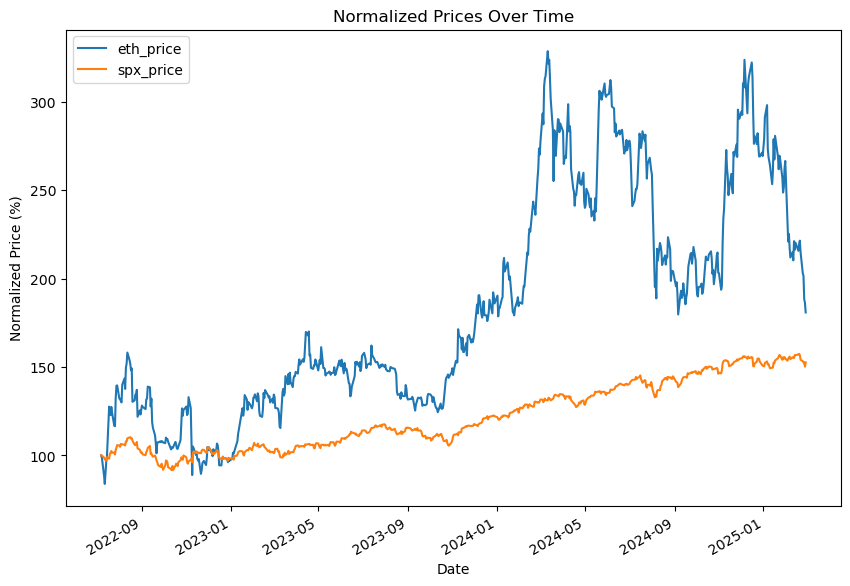

In [12]:

# Plotting normalized prices (thus considering they start from the same position)
df1 = df.copy()
# Set date as index
df1.set_index("date", inplace=True)

# Normalize data and plot
(df1/df1.iloc[0]*100).plot(figsize=(10,7))

plt.title("Normalized Prices Over Time")
plt.ylabel("Normalized Price (%)")
plt.xlabel("Date")
plt.show()


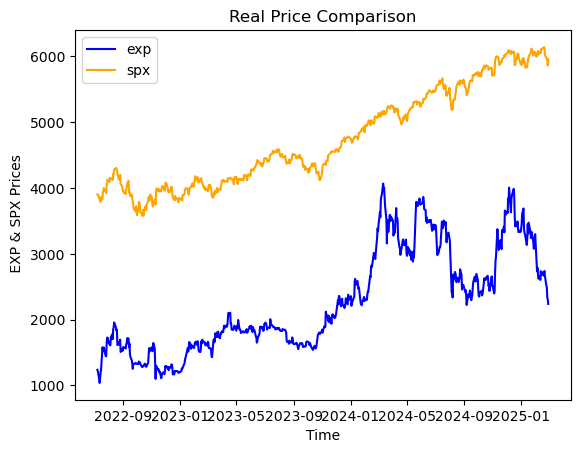

In [13]:
# Creating a graph
plt.plot(df['date'], df['eth_price'], label='exp', color='blue')
plt.plot(df['date'], df['spx_price'], label='spx', color='orange')
plt.title('Real Price Comparison')
plt.xlabel('Time')
plt.ylabel(' EXP & SPX Prices')
plt.legend()
plt.show()

In [14]:
# % change in prices
df['eth_change'] = df['eth_price'].pct_change()
df['spx_change'] = df['spx_price'].pct_change()

/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_99157/1715195792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eth_change'] = df['eth_price'].pct_change()
/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_99157/1715195792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spx_change'] = df['spx_price'].pct_change()


In [15]:
 # Grouping data into quarters per year
df['quarter'] = df['date'].dt.quarter
df['year'] = df['date'].dt.year

In [16]:
new=df.groupby(['year', 'quarter']).mean()
new.reset_index(inplace=True)
new.drop('date', axis=1, inplace=True)
new['time']=new['year'].astype(str) + 'Q'+ new['quarter'].astype(str)
new

,year,quarter,eth_price,spx_price,eth_change,spx_change,time
0,2022,3,1539.915082,3987.551967,0.002897,-0.001319,2022Q3
1,2022,4,1302.464603,3851.973492,-0.000419,0.001208,2022Q4
2,2023,1,1594.240161,4000.064516,0.007481,0.001151,2023Q1
3,2023,2,1862.647419,4206.072903,0.001386,0.001314,2023Q2
4,2023,3,1756.385873,4458.137460,-0.002138,-0.000567,2023Q3
5,2023,4,1957.702540,4464.907619,0.005667,0.001720,2023Q4
6,2024,1,2922.559836,4992.540984,0.008004,0.001611,2024Q1
7,2024,2,3364.002857,5246.626508,-0.000141,0.000633,2024Q2
8,2024,3,2803.629063,5543.469219,-0.002938,0.000891,2024Q3
9,2024,4,3068.251406,5907.042969,0.004764,0.000351,2024Q4


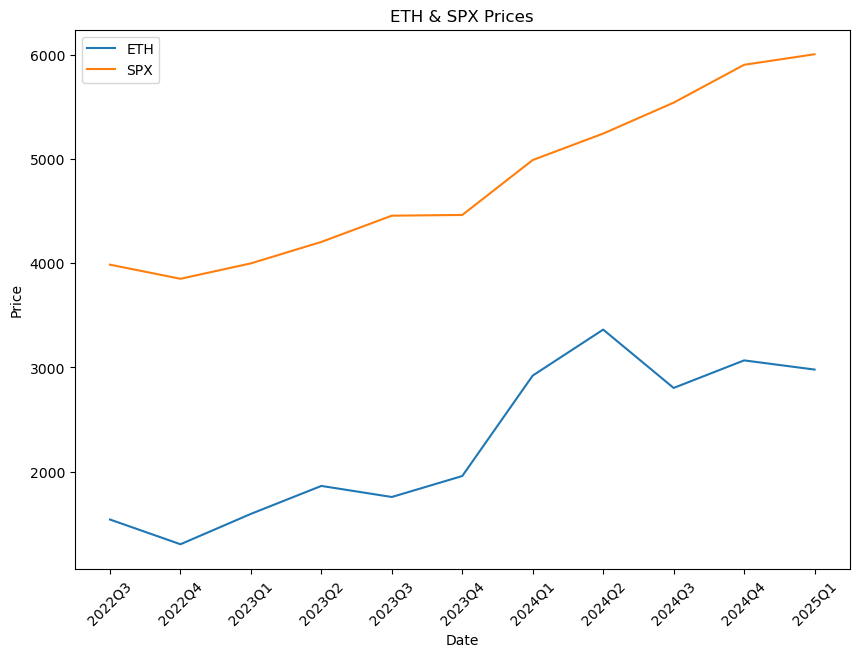

In [17]:
# Graphing the change in prices
plt.figure(figsize=(10,7))
plt.plot(new['time'], new['eth_price'], label='ETH')
plt.plot(new['time'], new['spx_price'], label='SPX')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ETH & SPX Prices")
plt.legend()
plt.show()

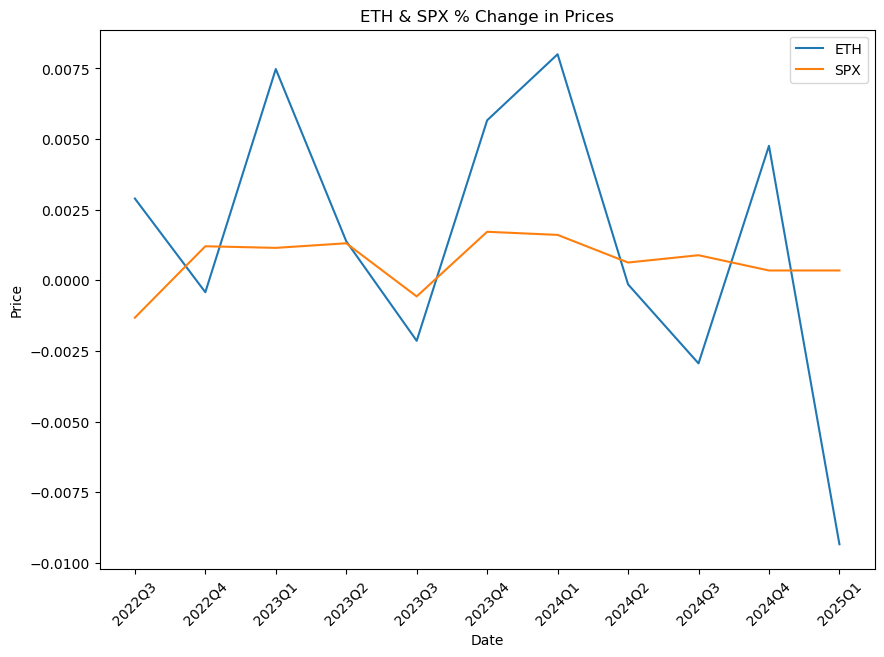

In [18]:
# Graphing the % change in prices
plt.figure(figsize=(10,7))
plt.plot(new['time'], new['eth_change'], label='ETH')
plt.plot(new['time'], new['spx_change'], label='SPX')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ETH & SPX % Change in Prices")
plt.legend()
plt.show()

In [19]:
# Linear regression on % change of prices

X = new[['year']]
y1 = new['eth_change']
y2 = new['spx_change']

model1 = LinearRegression().fit(X, y1)
model2 = LinearRegression().fit(X, y2)

y1_pred = model1.predict(X)
y2_pred = model2.predict(X)

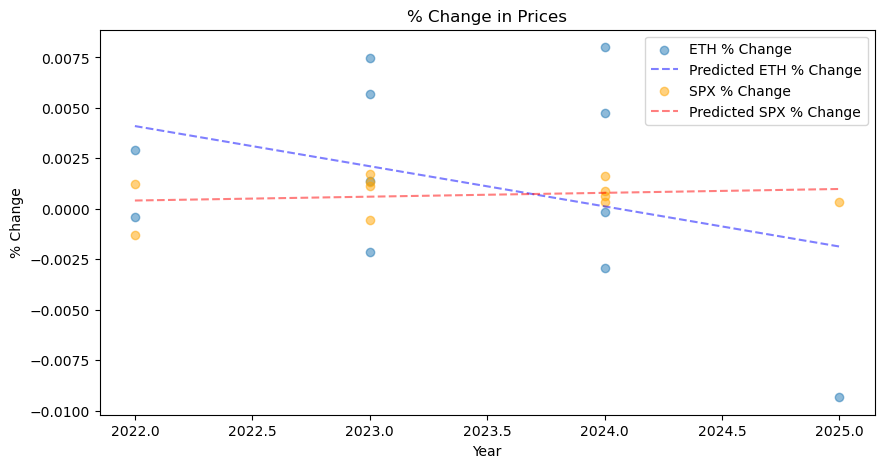

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(new['year'], y1, label="ETH % Change", alpha=0.5)
plt.plot(new['year'], y1_pred, label="Predicted ETH % Change", color='blue', alpha=0.5,linestyle="dashed")
plt.scatter(new['year'], y2, label="SPX % Change", alpha=0.5, color='orange')
plt.plot(new['year'], y2_pred, label="Predicted SPX % Change", color='red', alpha=0.5,linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("% Change")
plt.legend()
plt.title("% Change in Prices")
plt.show()

In [21]:
# Calculating ROI = (Final Price - Initial Price)/Initial Price * 100
# Comparing per quarter

new['eth_roi'] = 0 
new['spx_roi'] = 0  

for i in range(1, len(new)):  
    new.loc[i, 'eth_roi'] = (new.loc[i, 'eth_price'] - new.loc[i - 1, 'eth_price']) / new.loc[i - 1, 'eth_price'] * 100  
    new.loc[i, 'spx_roi'] = (new.loc[i, 'spx_price'] - new.loc[i - 1, 'spx_price']) / new.loc[i - 1, 'spx_price'] * 100  
new

/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_99157/4085179753.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-15.419712526568102' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new.loc[i, 'eth_roi'] = (new.loc[i, 'eth_price'] - new.loc[i - 1, 'eth_price']) / new.loc[i - 1, 'eth_price'] * 100
/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_99157/4085179753.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3.400042839927612' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new.loc[i, 'spx_roi'] = (new.loc[i, 'spx_price'] - new.loc[i - 1, 'spx_price']) / new.loc[i - 1, 'spx_price'] * 100


,year,quarter,eth_price,spx_price,eth_change,spx_change,time,eth_roi,spx_roi
0,2022,3,1539.915082,3987.551967,0.002897,-0.001319,2022Q3,0.000000,0.000000
1,2022,4,1302.464603,3851.973492,-0.000419,0.001208,2022Q4,-15.419713,-3.400043
2,2023,1,1594.240161,4000.064516,0.007481,0.001151,2023Q1,22.401803,3.844549
3,2023,2,1862.647419,4206.072903,0.001386,0.001314,2023Q2,16.836062,5.150127
4,2023,3,1756.385873,4458.137460,-0.002138,-0.000567,2023Q3,-5.704866,5.992872
5,2023,4,1957.702540,4464.907619,0.005667,0.001720,2023Q4,11.461984,0.151861
6,2024,1,2922.559836,4992.540984,0.008004,0.001611,2024Q1,49.285184,11.817341
7,2024,2,3364.002857,5246.626508,-0.000141,0.000633,2024Q2,15.104670,5.089303
8,2024,3,2803.629063,5543.469219,-0.002938,0.000891,2024Q3,-16.657946,5.657782
9,2024,4,3068.251406,5907.042969,0.004764,0.000351,2024Q4,9.438565,6.558596


In [22]:
# Regression on ROI of eth & spx

X = new[['year']]
y3 = new['eth_roi']
y4 = new['spx_roi']

model3 = LinearRegression().fit(X, y3)
model4 = LinearRegression().fit(X, y4)

y3_pred = model3.predict(X)
y4_pred = model4.predict(X)

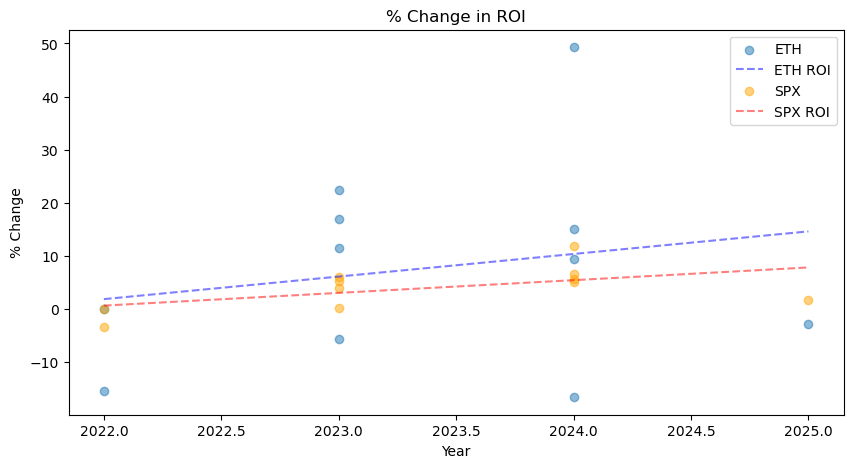

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(new['year'], y3, label="ETH", alpha=0.5)
plt.plot(new['year'], y3_pred, label="ETH ROI", color='blue', alpha=0.5,linestyle="dashed")
plt.scatter(new['year'], y4, label="SPX", alpha=0.5, color='orange')
plt.plot(new['year'], y4_pred, label="SPX ROI", color='red', alpha=0.5,linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("% Change")
plt.legend()
plt.title("% Change in ROI")
plt.show()

In [24]:
# The eth percentage change seems to be slowing down, however its ROI is still increasing. This shows that ethereum stock will go up, however not for too long. 
# On the other hand, the spx remains a stable, but good choice with a slightly increasnig ROI, and steady positive percentage change.

In [25]:
#second part

In [26]:
# Grouping by month and calculating avg price per month. Then changing month from period to datetime 
monthed=df.groupby(df['date'].dt.to_period("M")).agg({'eth_price':'mean', 'spx_price':'mean'}).reset_index()
monthed['date']=monthed['date'].dt.to_timestamp()
monthed['date']=monthed['date'].dt.strftime('%Y-%m ')
monthed

monthed_g1=monthed.copy()

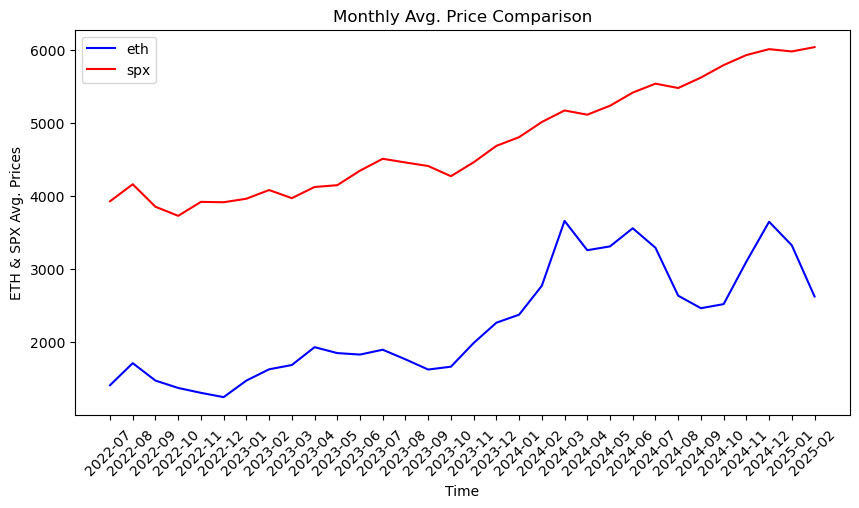

In [27]:
# Creating a graph
plt.figure(figsize=(10, 5))
monthed_g1=monthed.copy()
plt.plot(monthed_g1['date'], monthed_g1['eth_price'], label='eth', color='blue')
plt.plot(monthed_g1['date'], monthed_g1['spx_price'], label='spx', color='red')
plt.title('Monthly Avg. Price Comparison')
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('ETH & SPX Avg. Prices')
plt.legend()
plt.show()

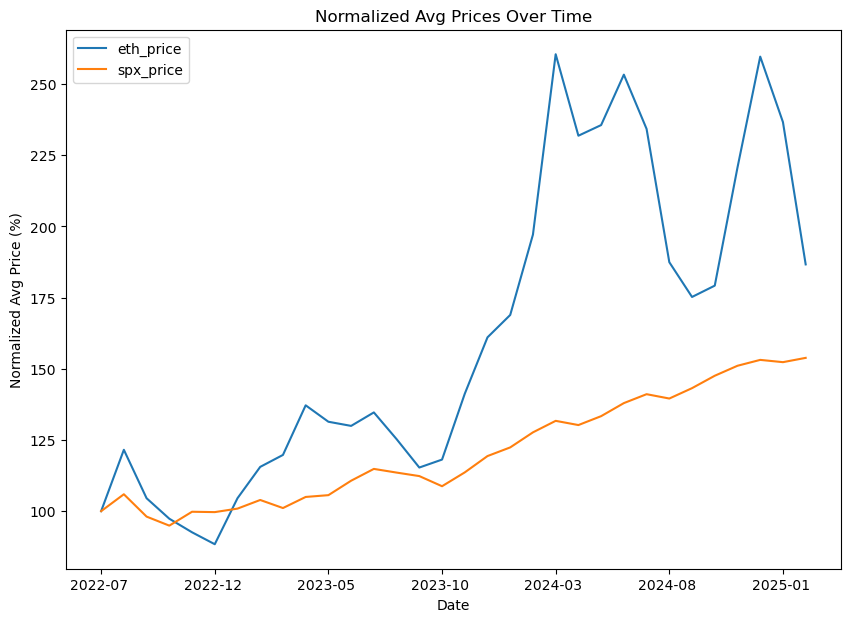

In [28]:
# Set date as index
monthed_g2=monthed.copy()
monthed_g2.set_index("date", inplace=True)

# Normalize data and plot
(monthed_g2/monthed_g2.iloc[0]*100).plot(figsize=(10,7))

plt.title("Normalized Avg Prices Over Time")
plt.ylabel("Normalized Avg Price (%)")
plt.xlabel("Date")
plt.show()

In [29]:
monthed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       32 non-null     object 
 1   eth_price  32 non-null     float64
 2   spx_price  32 non-null     float64
dtypes: float64(2), object(1)
memory usage: 896.0+ bytes


In [30]:
month_reg=monthed.copy()
month_reg['date']=pd.to_numeric(month_reg['date'].str.replace('-',''))
month_reg.info()
month_reg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       32 non-null     int64  
 1   eth_price  32 non-null     float64
 2   spx_price  32 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 896.0 bytes


,date,eth_price,spx_price
0,202207,1403.890588,3925.458235
1,202208,1706.467391,4158.563043
2,202209,1467.615714,3850.520476
3,202210,1366.707619,3726.050952
4,202211,1299.747619,3917.488571


In [31]:
for i in range(0, len(month_reg)):
    month_reg.loc[i, 'date']=i+1
month_reg.head()

,date,eth_price,spx_price
0,1,1403.890588,3925.458235
1,2,1706.467391,4158.563043
2,3,1467.615714,3850.520476
3,4,1366.707619,3726.050952
4,5,1299.747619,3917.488571


In [32]:
X = month_reg['date'].values.reshape(-1, 1)
y1=month_reg['eth_price']
y2=month_reg['spx_price']

In [33]:
model1=LinearRegression().fit(X,y1)
model2=LinearRegression().fit(X,y2)

In [34]:
y1_pred = model1.predict(X)
y2_pred = model2.predict(X)

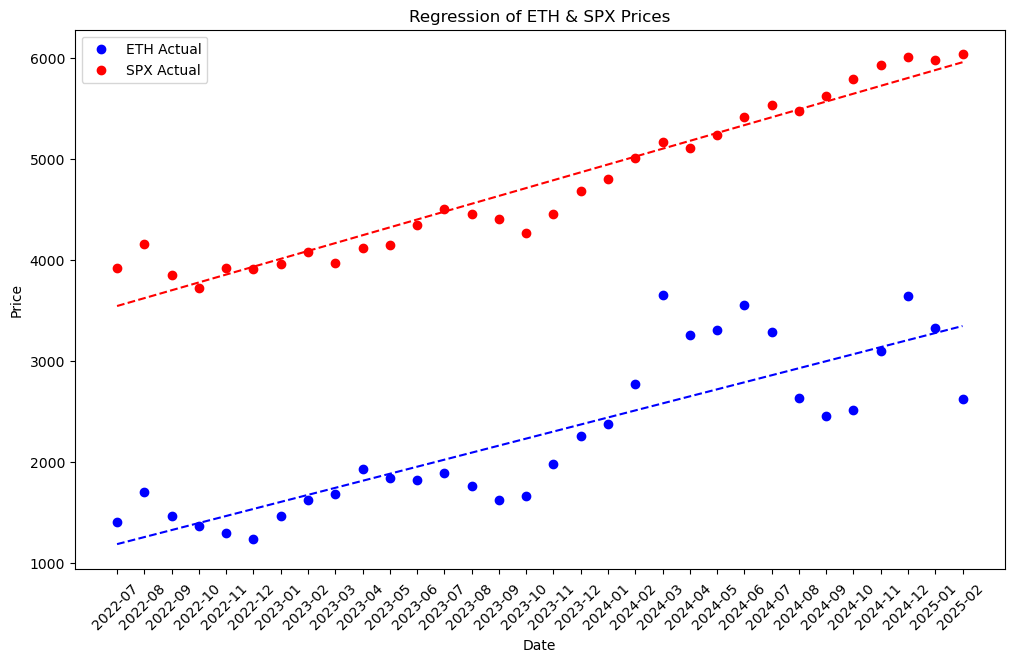

In [35]:
plt.figure(figsize=(12, 7))
plt.scatter(monthed_g1['date'], y1, color='blue', label="ETH Actual")
plt.scatter(monthed_g1['date'], y2, color='red', label="SPX Actual")
plt.plot(monthed_g1['date'], y1_pred, color='blue', linestyle='dashed')
plt.plot(monthed_g1['date'], y2_pred, color='red', linestyle='dashed')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Regression of ETH & SPX Prices")
plt.legend()
plt.show()

In [36]:
#Calculating the R squared of the regressions
r2_1 = model1.score(X, y1).round(2)
r2_2 = model2.score(X, y2).round(2)

print(f"The R squared of the linaer regression models used for ETH and SPC are {r2_1*100}% and {r2_2*100}% respectively.")

The R squared of the linaer regression models used for ETH and SPC are 71.0% and 94.0% respectively.


In [37]:
quarts=monthed.copy()
quarts['date']=pd.to_datetime(quarts['date'])
quarts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       32 non-null     datetime64[ns]
 1   eth_price  32 non-null     float64       
 2   spx_price  32 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 896.0 bytes


/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_99157/2143871176.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  quarts['date']=pd.to_datetime(quarts['date'])


In [38]:
quarts['quarter']=quarts['date'].dt.quarter
quarts['year']=quarts['date'].dt.year
quarts.drop('date', axis=1, inplace=True)
quarts.head()

,eth_price,spx_price,quarter,year
0,1403.890588,3925.458235,3,2022
1,1706.467391,4158.563043,3,2022
2,1467.615714,3850.520476,3,2022
3,1366.707619,3726.050952,4,2022
4,1299.747619,3917.488571,4,2022


In [39]:
g_quarts=quarts.groupby(['year', 'quarter']).agg({'eth_price':'mean', 'spx_price':'mean'}).reset_index()
g_quarts

,year,quarter,eth_price,spx_price
0,2022,3,1525.991231,3978.180585
1,2022,4,1302.464603,3851.973492
2,2023,1,1590.365159,4002.966789
3,2023,2,1864.935013,4204.337802
4,2023,3,1756.253949,4458.176399
5,2023,4,1967.268185,4471.505247
6,2024,1,2931.749333,4995.675143
7,2024,2,3372.727775,5254.286236
8,2024,3,2793.213758,5545.826530
9,2024,4,3086.265911,5911.048046


In [40]:
# Linear Regression for quarterly data
X=g_quarts[['year', 'quarter']]
y3=g_quarts['eth_price']
y4=g_quarts['spx_price']
model3=LinearRegression().fit(X,y3)
model4=LinearRegression().fit(X,y4)

y3_pred = model3.predict(X)
y4_pred = model4.predict(X)

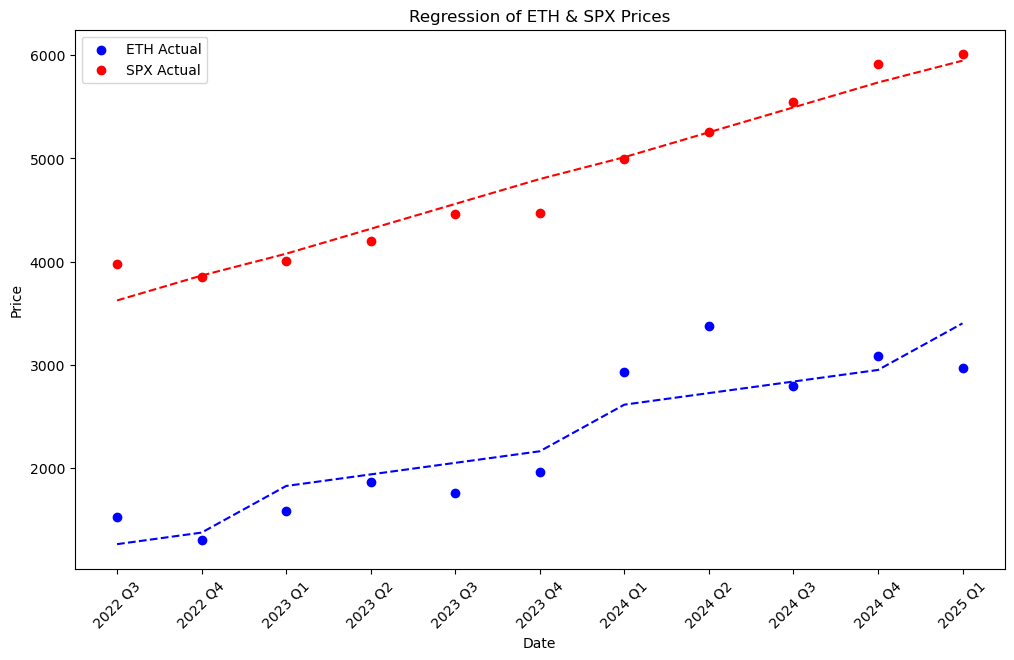

In [41]:
g_quarts['time'] = g_quarts['year'].astype(str) + ' Q' + g_quarts['quarter'].astype(str)

plt.figure(figsize=(12, 7))
plt.scatter(g_quarts['time'], y3, color='blue', label="ETH Actual")
plt.scatter(g_quarts['time'], y4, color='red', label="SPX Actual")
plt.plot(g_quarts['time'], y3_pred, color='blue', linestyle='dashed')
plt.plot(g_quarts['time'], y4_pred, color='red', linestyle='dashed')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Regression of ETH & SPX Prices")
plt.legend()
plt.show()

In [42]:
g_quarts['moving_avg_eth'] = g_quarts['eth_price'].rolling(window=2).mean()
g_quarts['moving_avg_spx'] = g_quarts['spx_price'].rolling(window=2).mean()

g_quarts['pct_change_eth'] = g_quarts['moving_avg_eth'].pct_change()
g_quarts['pct_change_spx'] = g_quarts['moving_avg_spx'].pct_change()

g_quarts

,year,quarter,eth_price,spx_price,time,moving_avg_eth,moving_avg_spx,pct_change_eth,pct_change_spx
0,2022,3,1525.991231,3978.180585,2022 Q3,NaN,NaN,NaN,NaN
1,2022,4,1302.464603,3851.973492,2022 Q4,1414.227917,3915.077039,NaN,NaN
2,2023,1,1590.365159,4002.966789,2023 Q1,1446.414881,3927.470141,0.022759,0.003165
3,2023,2,1864.935013,4204.337802,2023 Q2,1727.650086,4103.652296,0.194436,0.044859
4,2023,3,1756.253949,4458.176399,2023 Q3,1810.594481,4331.257101,0.048010,0.055464
5,2023,4,1967.268185,4471.505247,2023 Q4,1861.761067,4464.840823,0.028260,0.030842
6,2024,1,2931.749333,4995.675143,2024 Q1,2449.508759,4733.590195,0.315694,0.060192
7,2024,2,3372.727775,5254.286236,2024 Q2,3152.238554,5124.980689,0.286886,0.082684
8,2024,3,2793.213758,5545.826530,2024 Q3,3082.970766,5400.056383,-0.021974,0.053674
9,2024,4,3086.265911,5911.048046,2024 Q4,2939.739834,5728.437288,-0.046459,0.060811


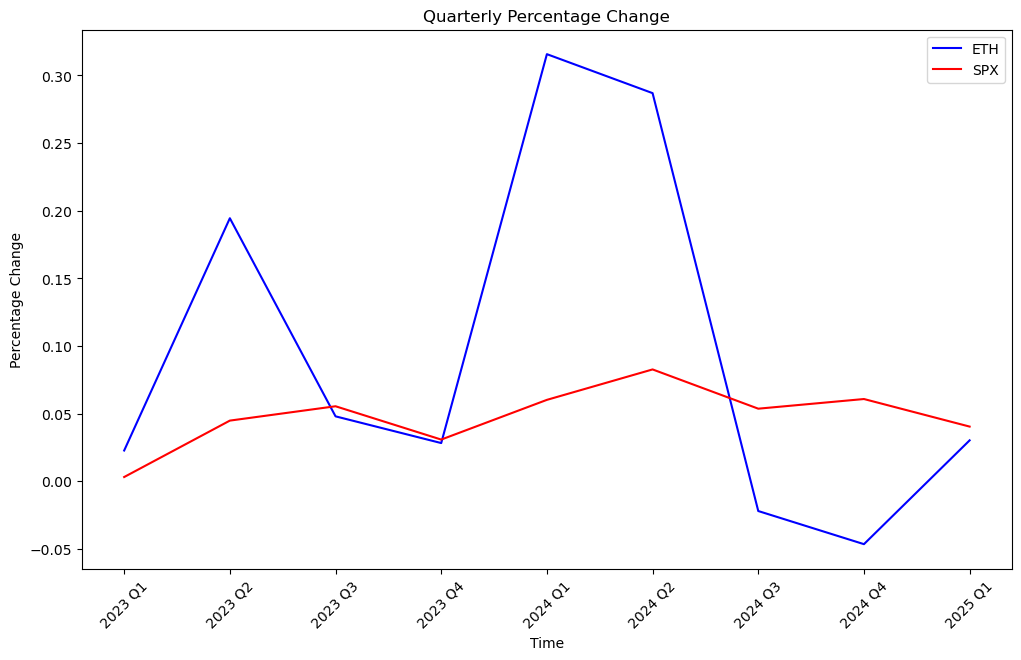

In [43]:
plt.figure(figsize=(12, 7))
plt.plot(g_quarts['time'], g_quarts['pct_change_eth'], label='ETH', color='blue')
plt.plot(g_quarts['time'], g_quarts['pct_change_spx'], label='SPX', color='red')
plt.title('Quarterly Percentage Change')
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

In [44]:
g_quarts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            11 non-null     int32  
 1   quarter         11 non-null     int32  
 2   eth_price       11 non-null     float64
 3   spx_price       11 non-null     float64
 4   time            11 non-null     object 
 5   moving_avg_eth  10 non-null     float64
 6   moving_avg_spx  10 non-null     float64
 7   pct_change_eth  9 non-null      float64
 8   pct_change_spx  9 non-null      float64
dtypes: float64(6), int32(2), object(1)
memory usage: 832.0+ bytes


In [45]:
g_qcopy=g_quarts.copy()
g_qcopy.dropna(inplace=True)

In [46]:
X=g_qcopy[['year', 'quarter']]
y5=g_qcopy['pct_change_eth']
y6=g_qcopy['pct_change_spx']

model5=LinearRegression().fit(X,y5)
model6=LinearRegression().fit(X,y6)

y5_pred = model5.predict(X)
y6_pred = model6.predict(X)

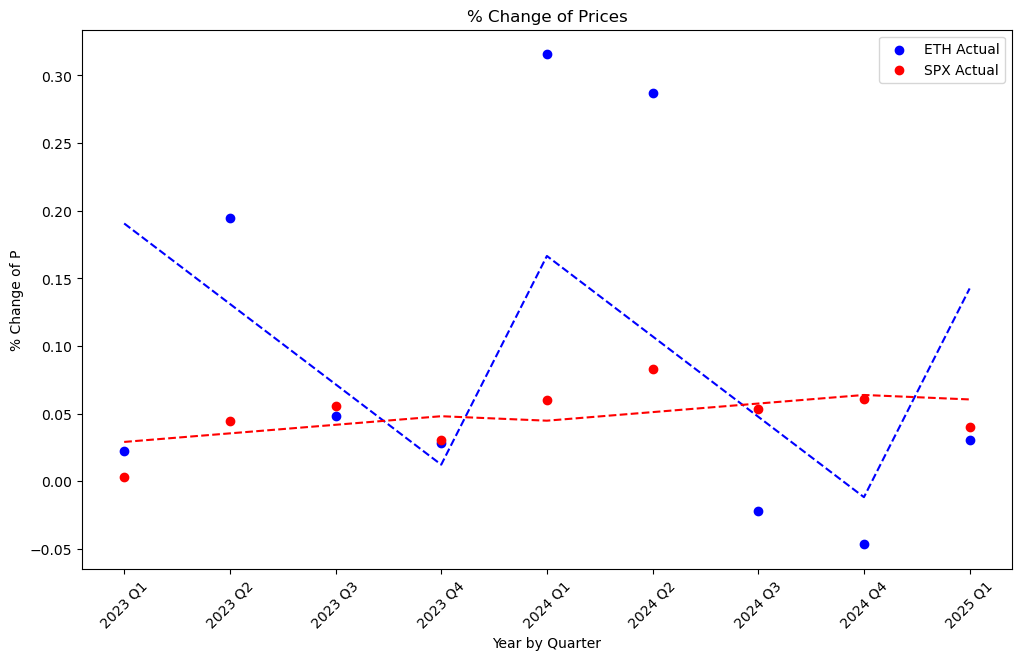

In [47]:
plt.figure(figsize=(12, 7))
plt.scatter(g_qcopy['time'], y5, color='blue', label="ETH Actual")
plt.scatter(g_qcopy['time'], y6, color='red', label="SPX Actual")
plt.plot(g_qcopy['time'], y5_pred, color='blue', linestyle='dashed')
plt.plot(g_qcopy['time'], y6_pred, color='red', linestyle='dashed')
plt.xticks(rotation=45)
plt.xlabel("Year by Quarter")
plt.ylabel("% Change of P")
plt.title("% Change of Prices")
plt.legend()
plt.show()

In [48]:
#third part

In [49]:
# Considering first date as purchase day and last date as selling day
investment_date = "2022-07-07"
final_date = "2025-02-28"

# Extract prices
if investment_date in df1.index and final_date in df1.index:
    investment_price = df1.loc[investment_date]
    final_price = df1.loc[final_date]

    # Compute return on investment
    roi = ((final_price - investment_price) / investment_price) * 100
    print("Return on Investment (RoI):")
    print(roi)
else:
    print("missing dates in the DataFrame.")


Return on Investment (RoI):
eth_price    80.828061
spx_price    52.576987
dtype: float64


In [50]:
df1.head()

,eth_price,spx_price
date,,
2022-07-07,1237.59,3902.62
2022-07-08,1222.51,3899.38
2022-07-11,1097.24,3854.43
2022-07-12,1038.19,3818.80
2022-07-13,1113.59,3801.78


In [51]:
df.head()

,date,eth_price,spx_price,eth_change,spx_change,quarter,year
0,2022-07-07,1237.59,3902.62,NaN,NaN,3,2022
1,2022-07-08,1222.51,3899.38,-0.012185,-0.000830,3,2022
2,2022-07-11,1097.24,3854.43,-0.102470,-0.011527,3,2022
3,2022-07-12,1038.19,3818.80,-0.053817,-0.009244,3,2022
4,2022-07-13,1113.59,3801.78,0.072626,-0.004457,3,2022


In [52]:
df_norm = df1.apply(lambda x: np.log(x) - np.log(x[0]))
df_norm.head()

/var/folders/zj/9fz4tznn7953lty4s90jjsqc0000gn/T/ipykernel_99157/3226110118.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_norm = df1.apply(lambda x: np.log(x) - np.log(x[0]))


,eth_price,spx_price
date,,
2022-07-07,0.000000,0.000000
2022-07-08,-0.012260,-0.000831
2022-07-11,-0.120368,-0.012425
2022-07-12,-0.175687,-0.021712
2022-07-13,-0.105577,-0.026179


In [53]:
#compute log returns with pandas using the shift method
lnret = np.log(df1)-np.log(df1.shift(1))
lnret.head()

,eth_price,spx_price
date,,
2022-07-07,NaN,NaN
2022-07-08,-0.012260,-0.000831
2022-07-11,-0.108108,-0.011594
2022-07-12,-0.055319,-0.009287
2022-07-13,0.070110,-0.004467


In [54]:
lnret.dropna(inplace=True)

In [55]:
# value at risk with confidence level 

stocks = df1.columns  # get tickers names
conf = 0.01
for stock in stocks:
    val_at_risk = lnret[stock].quantile(conf)
    print("The VaR for stock with ticker " + stock + " is = " + str(val_at_risk))

The VaR for stock with ticker eth_price is = -0.10808490042845946
The VaR for stock with ticker spx_price is = -0.024424573669356332


In [56]:
lnret['eth_price'].describe()

count    664.000000
mean       0.000892
std        0.040954
min       -0.211324
25%       -0.019241
50%       -0.000205
75%        0.020038
max        0.247059
Name: eth_price, dtype: float64

In [57]:
lnret['spx_price'].describe()

count    664.000000
mean       0.000636
std        0.009694
min       -0.044199
25%       -0.004690
50%        0.000584
75%        0.006193
max        0.053953
Name: spx_price, dtype: float64

In [58]:
lnret.corr()

,eth_price,spx_price
eth_price,1.000000,0.353464
spx_price,0.353464,1.000000


In [59]:
%%time
prets = [] # mean return
pvols = [] # standard deviation
pweights = [] # weights
pvar5 = [] # VaR 5%
conf = 0.05
rf = 0.04 # assuming a risk free rate of 4% 

for p in range(5000):
    weights = np.random.random(2)
    weights /= np.sum(weights) # weights sum must be 1
    prets.append(np.sum(lnret.mean()*weights)*252)
    pvols.append(np.sqrt(np.dot(weights.T,np.dot(lnret.cov()*252,weights))))
    pweights.append(weights)
    pvar5.append(np.quantile(np.dot(lnret.dropna(), weights.T), conf)) # take quantile of portfolio using lnret

    
prets = np.array(prets)
pvols = np.array(pvols)
pvar5 = np.array(pvar5)
    

CPU times: user 1.98 s, sys: 8.1 ms, total: 1.99 s
Wall time: 1.69 s


In [60]:
# portfolio sharpe ratios
p_sharpe = (prets-rf)/pvols

In [61]:
# find the portfolio with max SR
max_value = np.max(p_sharpe)  # Get the maximum value in array p_sharpe
max_indices = np.where(p_sharpe == max_value)[0]  # Get the indices where p_sharpe is equal to its max

if len(max_indices) == 1:  # If there's only one index where p_sharpe is equal to its max
    a_index = max_indices[0]  # Select it
    a_value = pweights[a_index]  # Get the corresponding value in pweights
    print(f"The weights for the maximum sr portfolio are: {a_value.round(5)}.")
else:
    print("There are multiple indices where p_sharpe is equal to its max.")

The weights for the maximum sr portfolio are: [0.00239 0.99761].


In [62]:
# find the portfolio with min variance
min_value = np.min(pvols)  # Get the min value in array pvols
min_indices = np.where(pvols == min_value)[0]  # Get the indices where pvols is equal to its min

if len(min_indices) == 1:  # If there's only one index where pvols is equal to its min
    a_index = min_indices[0]  # Select it
    a_value = pweights[a_index]  # Get the corresponding value in pweights
    print(f"The weights for the minimum variance portfolio are: {a_value.round(4)}.")
    
else:
    print("There are multiple indices where pvar is equal to its min.")

The weights for the minimum variance portfolio are: [0.001 0.999].
